# Entrainer un réseau de neurones avec Keras

### Objectif: 
- Apprendre un réseau de neurones avec `tensorflow` et Keras

### Jeu de données:
- Digits: 10 class handwritten digits
- https://keras.io/api/datasets/mnist/

In [1]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

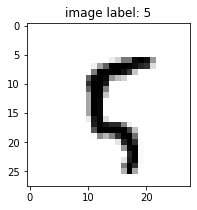

In [2]:
sample_index = 100
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % y_train[sample_index]);

## Séparation apprentissage / test


Les données fournies par keras sont déjà séparées, mais on pourrait les séparer avec la fonction `train_test_split` de scikit-learn si nécessaire.

## Préparation des données

Normalisation des données : quelle méthode appliquer ?

Les données images ont un traitement particulier en général.
- Chaque image est composée de 28x28 pixels : nous allons le transformer en un array de 784 pixels
- Chaque pixel est composé de 3 couleurs : R, G, B
- Chaque niveau de couleur est encodé sur 8 bits : 2^8 = 0 à 255

In [3]:
# Reshape des images
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [4]:
X_train.min(), X_train.max()

(0, 255)

En conséquence, on normalise entre 0 et 1 en divisant par 255 :

In [5]:
X_train = X_train / 255
X_test = X_test / 255

## Préparation de la cible

Utilisation de one-hot encoding

In [6]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

Keras a une fonction qui permet de modifier les valeurs entières en one hot encoding :

In [7]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Construction d'un réseau de neurones simple avec keras

### Un premier modèle avec Keras

Nous pouvons maintenant construire notre premier réseau de neurones en utilisant l'API de Keras:

- d'abord nous définissons le modèle en empilant des couches avec les bonnes dimensions
- puis on définit une fonction de perte et on branche l'optimiseur SGD
- puis nous alimentons le modèle avec les données d'apprentissage pour un nombre fixe d'époques

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = 10
# Construction du réseau de neurones
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))
# Compilation avec l'optimiseur SGD, la loss categorical_crossentropy
model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])
# Entrainement du modèle
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5200 - accuracy: 0.8524 - val_loss: 0.2231 - val_accuracy: 0.9377
Epoch 2/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2177 - accuracy: 0.9381 - val_loss: 0.1817 - val_accuracy: 0.9472
Epoch 3/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1599 - accuracy: 0.9556 - val_loss: 0.1471 - val_accuracy: 0.9591
Epoch 4/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1301 - accuracy: 0.9633 - val_loss: 0.1302 - val_accuracy: 0.9622
Epoch 5/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1062 - accuracy: 0.9703 - val_loss: 0.1169 - val_accuracy: 0.9663
Epoch 6/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0905 - accuracy: 0.9757 - val_loss: 0.1141 - val_accuracy: 0.9660
Epoch 7/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0788 - accuracy: 0.9781 - val_loss: 0.1111 - val_accuracy:

### Visualisation de la convergence

On rassemble tout dans un DataFrame

In [9]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.354045,0.898958,0.223141,0.937750,0
1,0.205148,0.941063,0.181716,0.947167,1
2,0.155025,0.955813,0.147148,0.959083,2
3,0.125083,0.964083,0.130183,0.962167,3
4,0.104752,0.970458,0.116860,0.966333,4
5,0.088735,0.974750,0.114076,0.966000,5
6,0.076832,0.978188,0.111105,0.967833,6
7,0.066758,0.982021,0.108681,0.969083,7
8,0.058856,0.984292,0.101494,0.971167,8
9,0.052490,0.985708,0.094981,0.973000,9


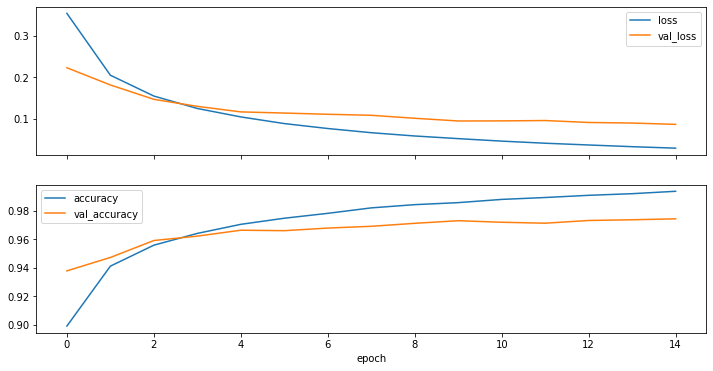

In [10]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);